In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle
import csv

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image
from ast import literal_eval
import matplotlib


In [9]:
df_angry_h0_1=pd.read_csv("Results/angry_100images_H0.csv")
df_disgust_h0_1=pd.read_csv("Results/disgust_100images_H0.csv")
df_fear_h0_1=pd.read_csv("Results/fear_100images_H0.csv")
df_happy_h0_1=pd.read_csv("Results/happy_100images_H0.csv")
df_sad_h0_1=pd.read_csv("Results/sad_100images_H0.csv")
df_surprise_h0_1=pd.read_csv("Results/surprise_100images_H0.csv")
df_neutral_h0_1=pd.read_csv("Results/neutral_100images_H0.csv")

df_angry_h0_2=pd.read_csv("Results/angry_2_100images_H0.csv")
df_disgust_h0_2=pd.read_csv("Results/disgust_2_100images_H0.csv")
df_fear_h0_2=pd.read_csv("Results/fear_2_100images_H0.csv")
df_happy_h0_2=pd.read_csv("Results/happy_2_100images_H0.csv")
df_sad_h0_2=pd.read_csv("Results/sad_2_100images_H0.csv")
df_surprise_h0_2=pd.read_csv("Results/surprise_2_100images_H0.csv")
df_neutral_h0_2=pd.read_csv("Results/neutral_2_100images_H0.csv")

df_angry_h0 = pd.concat([df_angry_h0_1,df_angry_h0_2],ignore_index=True)
df_disgust_h0 = pd.concat([df_disgust_h0_1,df_disgust_h0_2],ignore_index=True)
df_fear_h0 = pd.concat([df_fear_h0_1,df_fear_h0_2],ignore_index=True)
df_happy_h0 = pd.concat([df_happy_h0_1,df_happy_h0_2],ignore_index=True)
df_sad_h0 = pd.concat([df_sad_h0_1,df_sad_h0_2],ignore_index=True)
df_surprise_h0 = pd.concat([df_surprise_h0_1,df_surprise_h0_2],ignore_index=True)
df_neutral_h0 = pd.concat([df_neutral_h0_1,df_neutral_h0_2],ignore_index=True)

dict_h0 = dict([('Angry', df_angry_h0), ('Disgust', df_disgust_h0), ('Fear', df_fear_h0), 
               ('Happy', df_happy_h0), ('Sad', df_sad_h0), ('Surprise', df_surprise_h0),
               ('Neutral', df_neutral_h0)])

df_angry_h1_1=pd.read_csv("Results/angry_100images_H1.csv")
df_disgust_h1_1=pd.read_csv("Results/disgust_100images_H1.csv")
df_fear_h1_1=pd.read_csv("Results/fear_100images_H1.csv")
df_happy_h1_1=pd.read_csv("Results/happy_100images_H1.csv")
df_sad_h1_1=pd.read_csv("Results/sad_100images_H1.csv")
df_surprise_h1_1=pd.read_csv("Results/surprise_100images_H1.csv")
df_neutral_h1_1=pd.read_csv("Results/neutral_100images_H1.csv")

df_angry_h1_2=pd.read_csv("Results/angry_2_100images_H1.csv")
df_disgust_h1_2=pd.read_csv("Results/disgust_2_100images_H1.csv")
df_fear_h1_2=pd.read_csv("Results/fear_2_100images_H1.csv")
df_happy_h1_2=pd.read_csv("Results/happy_2_100images_H1.csv")
df_sad_h1_2=pd.read_csv("Results/sad_2_100images_H1.csv")
df_surprise_h1_2=pd.read_csv("Results/surprise_2_100images_H1.csv")
df_neutral_h1_2=pd.read_csv("Results/neutral_2_100images_H1.csv")

df_angry_h1 = pd.concat([df_angry_h1_1,df_angry_h1_2],ignore_index=True)
df_disgust_h1 = pd.concat([df_disgust_h1_1,df_disgust_h1_2],ignore_index=True)
df_fear_h1 = pd.concat([df_fear_h1_1,df_fear_h1_2],ignore_index=True)
df_happy_h1 = pd.concat([df_happy_h1_1,df_happy_h1_2],ignore_index=True)
df_sad_h1 = pd.concat([df_sad_h1_1,df_sad_h1_2],ignore_index=True)
df_surprise_h1 = pd.concat([df_surprise_h1_1,df_surprise_h1_2],ignore_index=True)
df_neutral_h1 = pd.concat([df_neutral_h1_1,df_neutral_h1_2],ignore_index=True)

dict_h1 = dict([('Angry', df_angry_h1), ('Disgust', df_disgust_h1), ('Fear', df_fear_h1), 
               ('Happy', df_happy_h1), ('Sad', df_sad_h1), ('Surprise', df_surprise_h1),
               ('Neutral', df_neutral_h1)])

In [10]:
df_angry_h0 = pd.concat([df_angry_h0_1,df_angry_h0_2],ignore_index=True)
df_angry_h0
df_disgust_h0["content 1"][0]

'[0.         2.         2.23606801 2.82842708 3.         3.1622777\n 3.46410155 3.60555124 3.7416575  4.         4.12310553 4.2426405\n 4.35889912 4.47213602 4.5825758  4.69041586 4.89897966 5.\n 5.09901953 5.38516474 5.47722578 5.65685415 5.74456263 5.83095169\n 6.         6.08276272 6.16441393 6.3245554  6.40312433 6.70820379\n 7.         7.28010988 7.48331499 7.54983425 7.6157732  7.81024981\n 8.06225777 8.24621105 8.30662346 8.48528099 8.77496433 9.1651516\n 9.21954441 9.84885788]'

### Reconstructing the PCNIF from the content

In [11]:
c1_temp = dict_h0["Angry"]["content 1"][0]
c1 = [float(x) for x in c1_temp[1:-1].split()]
c2_temp = dict_h0["Angry"]["content 2"][0]
c2 = [float(x) for x in c2_temp[1:-1].split()]
ce = [c1, c2]
#### Result
res = sr.Pcnif(ce)

## plot average stable ranks

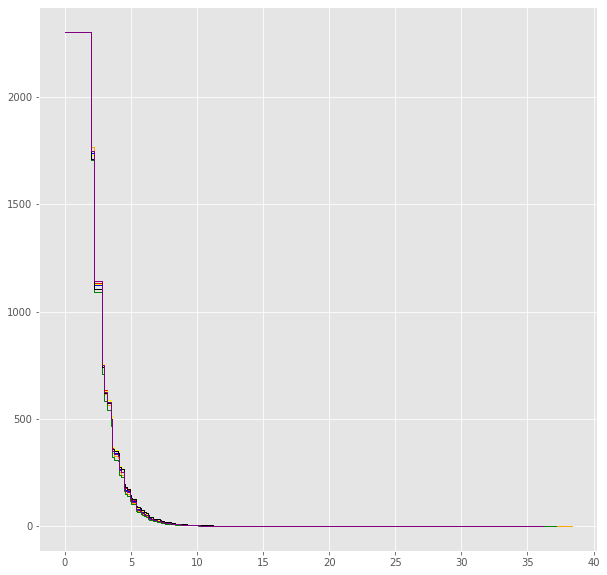

In [13]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]
dict_avesr_h0 = dict([])

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h0[emotion_name]
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        tot_pcf = tot_pcf + pcf
    ave_pcf = tot_pcf*(1/len(df_reload))
    dict_avesr_h0[emotion_name] = ave_pcf
    ave_pcf.plot(color = colors[e])

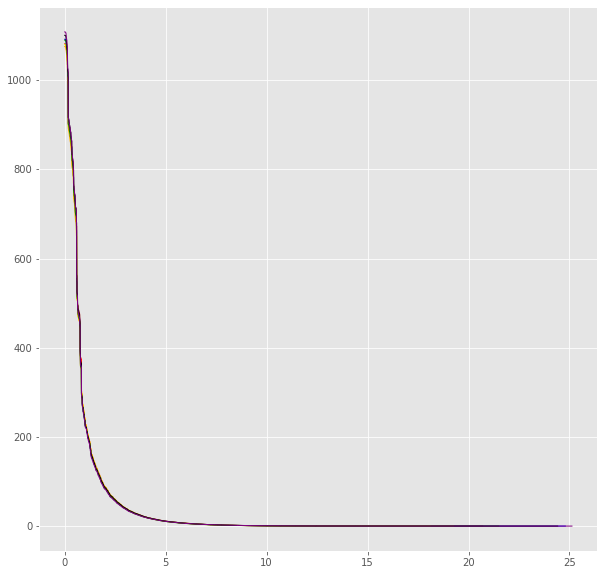

In [14]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]
dict_avesr_h1 = dict([])

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h1[emotion_name]
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        tot_pcf = tot_pcf + pcf
    ave_pcf = tot_pcf*(1/len(df_reload))
    dict_avesr_h1[emotion_name] = ave_pcf
    ave_pcf.plot(color = colors[e])

## Compute stable rank standard deviations

In [24]:
import math
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    df_reload = dict_h0[emotion_name]
    sumd = 0
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        d = pcf.interleaving_distance(dict_avesr_h0[emotion_name])
        sumd = sumd + d ** 2
    std = math.sqrt(1/len(df_reload)*sumd)
    print(std)

19.479201748710306
15.829726370845513
15.23110828244672
25.331110939882482
24.584115632059422
18.889056898107206
23.170578915955705


<Figure size 720x720 with 0 Axes>

In [25]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    df_reload = dict_h1[emotion_name]
    sumd = 0
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        d = pcf.interleaving_distance(dict_avesr_h1[emotion_name])
        sumd = sumd + d ** 2
    std = math.sqrt(1/len(df_reload)*sumd)
    print(std)

10.69455950535306
14.605452860535028
8.522196724546102
9.41513021655556
11.434609796505097
14.209334762090869
14.77853378793395


<Figure size 720x720 with 0 Axes>

## all graphs

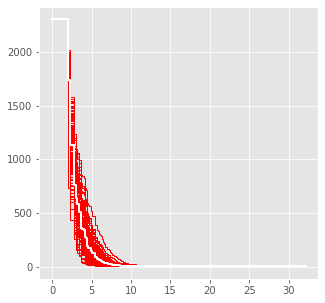

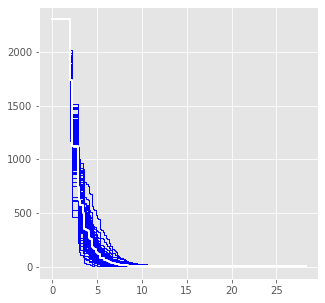

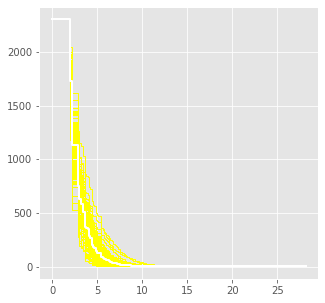

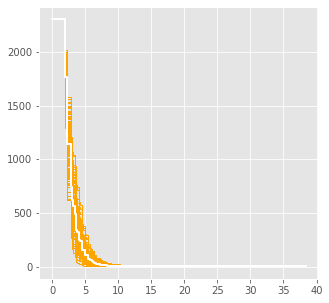

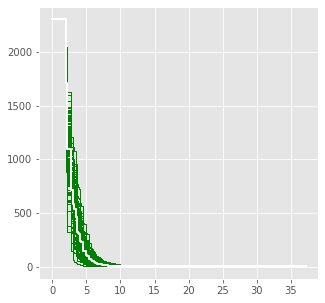

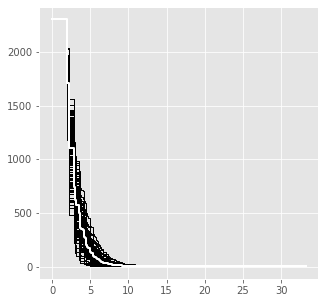

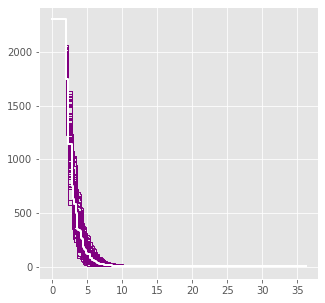

In [23]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]


for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h0[emotion_name]
    plt.figure(figsize=(5,5))
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        pcf.plot(color = colors[e])
    dict_avesr_h0[emotion_name].plot(color = "white", line_width = 2)

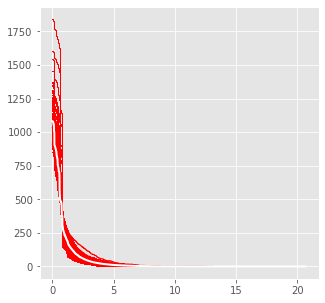

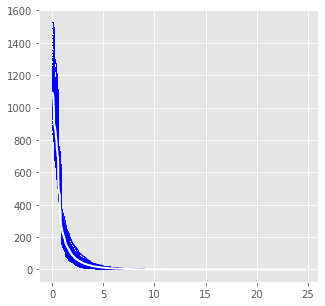

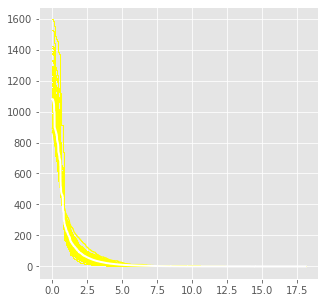

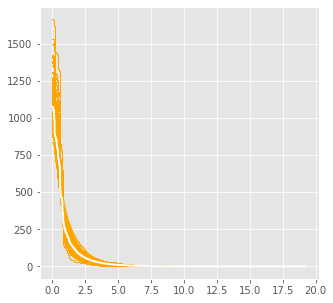

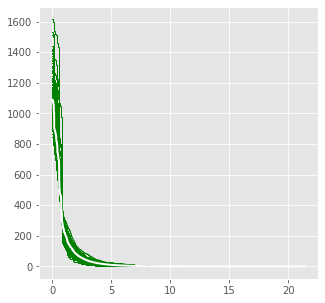

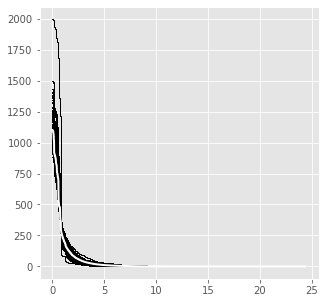

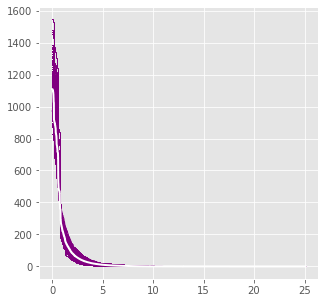

In [22]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]


for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h1[emotion_name]
    plt.figure(figsize=(5,5))
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][i]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][i]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        pcf.plot(color = colors[e])
    dict_avesr_h1[emotion_name].plot(color = "white", line_width = 2)

## Exporting for one emotion

In [39]:
# Selecting one emotion
e = 3
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

# specifying the number of pictures for subsampling
number_of_pictures = 100

# select homology and maxdim
degree="H0"
md=0

# Set up empty arrays for the indices and contents
indices = []
contents_1 = []
contents_2 = []

# Select random images for subsampling for emotion e
pos = np.array(np.where(df["emotion"]==e))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]
    
# Calculate stable ranks
for l in range(0,number_of_pictures):
    pixel_values_it = [int(numeric_string) for numeric_string in df["pixels"][rand_pos[l]].split(' ')]
    image_dummy_it = np.empty((48*48,3), int)
    for i in range(0,len(image_dummy_it)):
        image_dummy_it[i] = [(100/47)*(i-i%48)/48, (100/47)*(i%48), (100/47)*(47*pixel_values_it[i]/255)]

    image_stacked_it = np.vstack(image_dummy_it)
    image_it = sr.EucObject(image_stacked_it)

    b_it = image_it.get_bc(maxdim=md)
    S_it = sr.bc_to_sr(b_it, degree)
    
    content = S_it.content
    
    indices.append(rand_pos[l])
    contents_1.append(content[0])
    contents_2.append(content[1])
    
data = {'old index':indices, 'content 1':contents_1, 'content 2':contents_2}
df_out = pd.DataFrame(data)
df_out.to_csv("Results/")